In [59]:
import OpenEphys
from matplotlib import pyplot as plt
import numpy as np

In [94]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
f_name = "/mnt/data/temp/kaveh/openEphys_data/750um_past-dura-touch/100_CH1.continuous"

In [36]:
file_content = OpenEphys.load(f_name)

Loading continuous data...


u'30000'

<IPython.core.display.Javascript object>


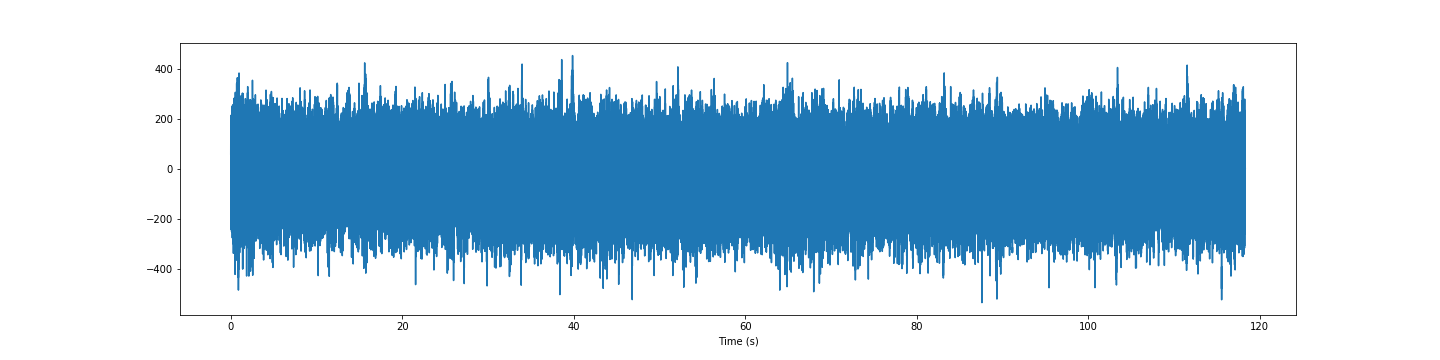

Text(0.5,0,u'Time (s)')

In [115]:
signal = file_content['data']
Fs = float(file_content['header']['sampleRate'])
dt = 1.0/Fs
plt.figure(figsize=(20,5))
plt.plot(np.arange(0, signal.size)*dt, signal)
plt.xlabel('Time (s)')


<IPython.core.display.Javascript object>


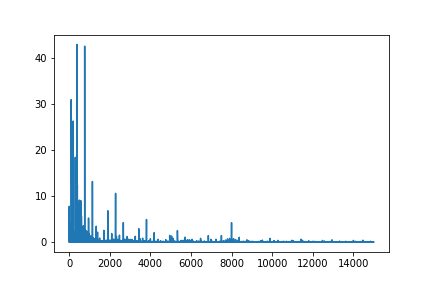

<IPython.core.display.Javascript object>


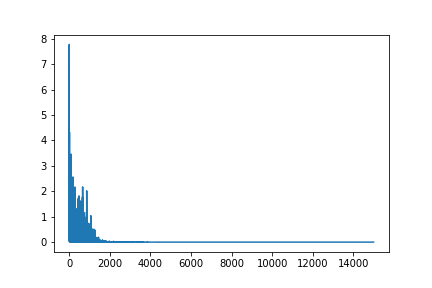

In [121]:
import scipy.signal
import scipy.fftpack


yf = scipy.fftpack.fft(signal)
N = signal.size
xf = np.linspace(0.0, 1.0 / (2.0 * dt), N/2)
power_spectrum = 2.0/N * np.abs(yf[:N//2])
plt.figure()
plt.plot(xf, power_spectrum)

filtered = notch_all_harmonics(signal, 100.0, Fs)
filtered = notch_all_harmonics(filtered, 190.4, Fs)
filtered = notch_all_harmonics(filtered, 465.4, Fs)

filtered = butter_lowpass_filter(filtered, 1500.0, Fs, 4)

yf = scipy.fftpack.fft(filtered)
N = filtered.size
xf = np.linspace(0.0, 1.0 / (2.0 * dt), N/2)
power_spectrum = 2.0/N * np.abs(yf[:N//2])
plt.figure()
plt.plot(xf, power_spectrum)
# # Number of samplepoints
# N = signal.size
# # sample spacing

# yf = scipy.fftpack.fft(signal)
# xf = np.linspace(0.0, 1.0/(2.0*dt), N/2)

# fig, ax = plt.subplots()
# ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
# plt.show()

<IPython.core.display.Javascript object>


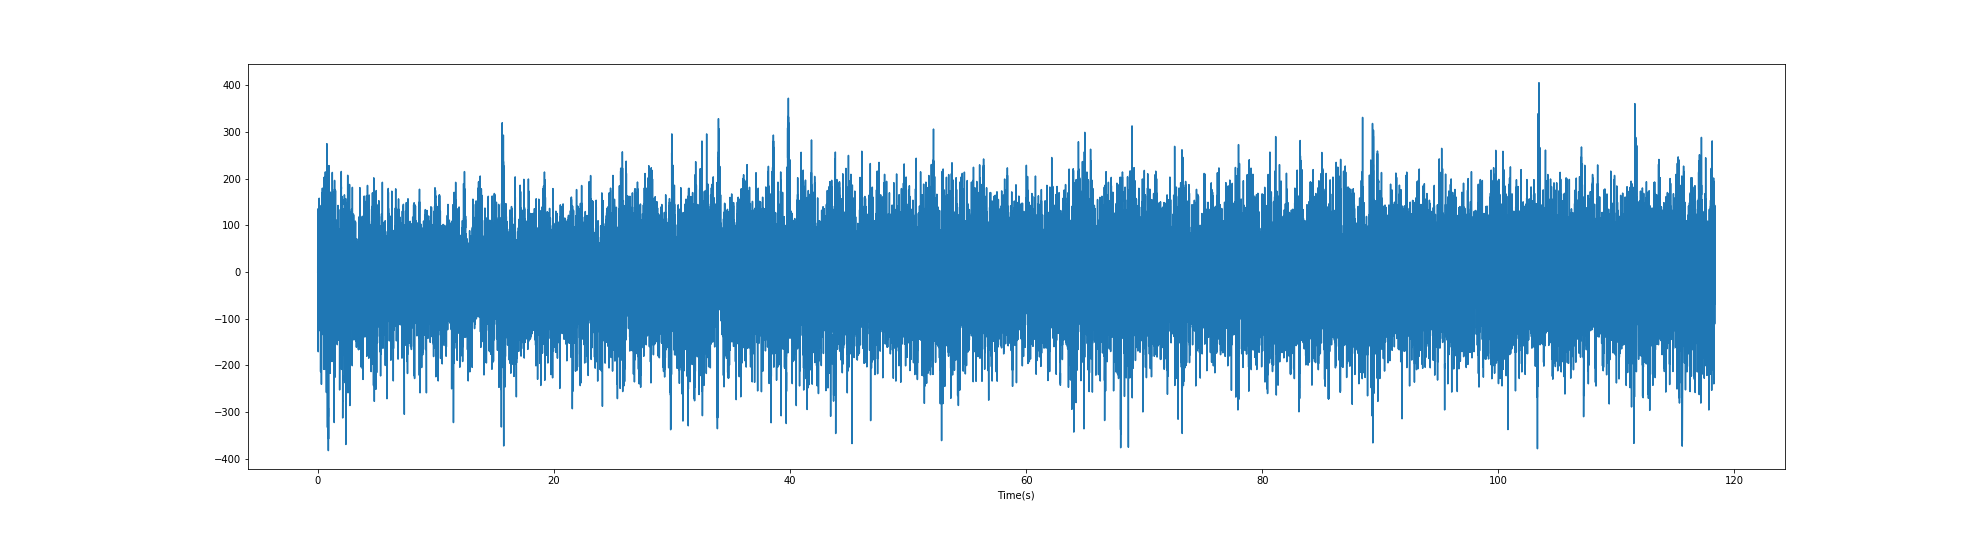

Text(0.5,0,u'Time(s)')

In [124]:
plt.figure()
plt.plot(np.arange(0, filtered.size)*dt, filtered)
plt.xlabel('Time(s)')

In [110]:
def notch_all_harmonics(signal, base_freq, sampling_rate):
    if base_freq > sampling_rate/2.0:
        print('Invalid frequency to notch')
        return
    curr_freq = base_freq
    while curr_freq < sampling_rate/2.0:
        b, a = scipy.signal.iirnotch(curr_freq/(sampling_rate/2.0), 30)
        signal = scipy.signal.lfilter(b, a, signal)
        curr_freq = curr_freq + base_freq
        
    return signal
        
    
    
    
    

In [120]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='low', analog=False)
    y = scipy.signal.lfilter(b, a, data)
    return y


In [125]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    y = scipy.signal.lfilter(b, a, data)
    return y
